**Author**: Debojit Gogoi.

**EMail**: debojitgogoi.blr@gmail.com

**Dataset**: Limited access

**Business problem definition:**

Help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. Also help predict a student's chances of admission given the rest of the variables.

**This document contains:**

* Summary: Objective and Outcome.
* Problem Statement: Primary goal and secondary goal
* Approach:
  * EDA
  * Feature creation, analysis and correlation
  * Linear regression modelling
  * Model evaluation and refinement
  * Insights and Recommendations
* Conclusion

# **Executive Summary**

**Objective**

To analyze and understand the key factors influencing Ivy League admission chances from an Indian applicant's perspective, leveraging data analytics and predictive modeling to provide actionable insights for students

**Outcome**

The analysis will empower Jamboree with data-backed insights to refine its admission probability feature, offering personalized guidance to students based on their academic and profile strengths.


# **Problem Statement**

**Primary Goal**

Identify and quantify the impact of various factors (such as GRE scores, TOEFL scores, University rating, Statement of Purpose (SOP) and Letter of Recommendation (LOR) strength, undergraduate GPA, and research experience) on the probability of Ivy League admissions.

**Secondary Goal**

Build a predictive model that can accurately estimate admission chances and assist in better feature implementation on Jamboree's platform.

**Problem Definition**

The goal of this analysis is to understand the key factors affecting Ivy League admission chances for Indian applicants. By examining relationships between various attributes (e.g., GRE score, TOEFL score, university rating, and GPA), we aim to develop a predictive model to estimate the likelihood of admission. This analysis will help Jamboree refine its admission probability feature, enabling students to make informed decisions about their applications.

# **Approach and Methodology**

**Exploratory Data Analysis (EDA)**

* Import the dataset (jamboree_admission.csv), check its structure, data types, and overall characteristics.
* Drop the unique identifier column to avoid any misleading associations in the model.
* Conduct both non-graphical (descriptive statistics) and graphical analyses (distribution plots, box plots, and scatter plots) for understanding the distribution and range of variables.
* Evaluate relationships between key factors like GRE, TOEFL, and University
* Rating with the Chance of Admit.

In [104]:
# import the required libraries for our exploration
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

In [69]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv -O jamboree_admission.csv

--2024-11-10 14:20:42--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.238.139.47, 18.238.139.211, 18.238.139.196, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.238.139.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16176 (16K) [text/plain]
Saving to: ‘jamboree_admission.csv’

jamboree_admission. 100%[===================>]  15.80K  --.-KB/s    in 0.001s  

2024-11-10 14:20:43 (27.8 MB/s) - ‘jamboree_admission.csv’ saved [16176/16176]



In [70]:
jamboree_data = pd.read_csv('jamboree_admission.csv')

In [71]:
jamboree_data.head(), jamboree_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


(   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
 0           1        337          118                  4  4.5   4.5  9.65   
 1           2        324          107                  4  4.0   4.5  8.87   
 2           3        316          104                  3  3.0   3.5  8.00   
 3           4        322          110                  3  3.5   2.5  8.67   
 4           5        314          103                  2  2.0   3.0  8.21   
 
    Research  Chance of Admit   
 0         1              0.92  
 1         1              0.76  
 2         1              0.72  
 3         1              0.80  
 4         0              0.65  ,
 None)

**Observations:**

The dataset consists of 500 rows and 9 columns:

**Columns:**

* **Serial No.**: Unique identifier (to be dropped for modeling).
* **GRE Score**: Scores on the GRE (out of 340).
* **TOEFL Score**: Scores on the TOEFL (out of 120).
* **University Rating**: Rating of the university (out of 5).
* **SOP**: Strength of Statement of Purpose (SOP) (out of 5).
* **LOR**: Strength of Letter of Recommendation (LOR) (out of 5).
* **CGPA**: Undergraduate GPA (out of 10).
* **Research**: Binary indicator for research experience (0 = No, 1 = Yes).
* **Chance of Admit**: Probability of admission (from 0 to 1).

Since all values are non-null, no missing values are present. I’ll proceed with univariate analysis by examining the distributions of each variable.

In [61]:
# for model sanity drop the serial no column
jamboree_data.drop(columns=['Serial No.'], inplace=True)
summary_statistics = jamboree_data.describe()
summary_statistics

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [80]:
# rename the Chance of Admit column to "Chance_of_Admit"
jamboree_data = jamboree_data.rename(columns={'Chance of Admit ': 'Chance_of_Admit'})
summary_statistics = jamboree_data.describe()
summary_statistics

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


**Observations:**

* **GRE Score:** This ranges from 290 to 340, with an average score of approximately 316.5. The distribution suggests students with a wide range of GRE scores apply for Ivy League admissions.
* **TOEFL Score:** The scores range from 92 to 120, with an average around 107. This suggests applicants generally have strong English language skills.
* **University Rating:** This ranges from 1 to 5, with a median of 3. This indicates a mix of applicants from universities of varying repute.
* **SOP and LOR Strength:** Both range from 1 to 5, with averages of 3.4 and 3.5, respectively. This suggests students generally submit moderate to strong recommendations.
* **CGPA:** This ranges from 6.8 to 9.92, with a mean of around 8.6. Most applicants have high GPAs.
* **Research:** This is a binary variable, with 56% of students having research experience.
* **Chance of Admit:** This is the target variable with ranges from 0.34 to 0.97, and an average admission probability of 0.72.

**Univariate Analysis**

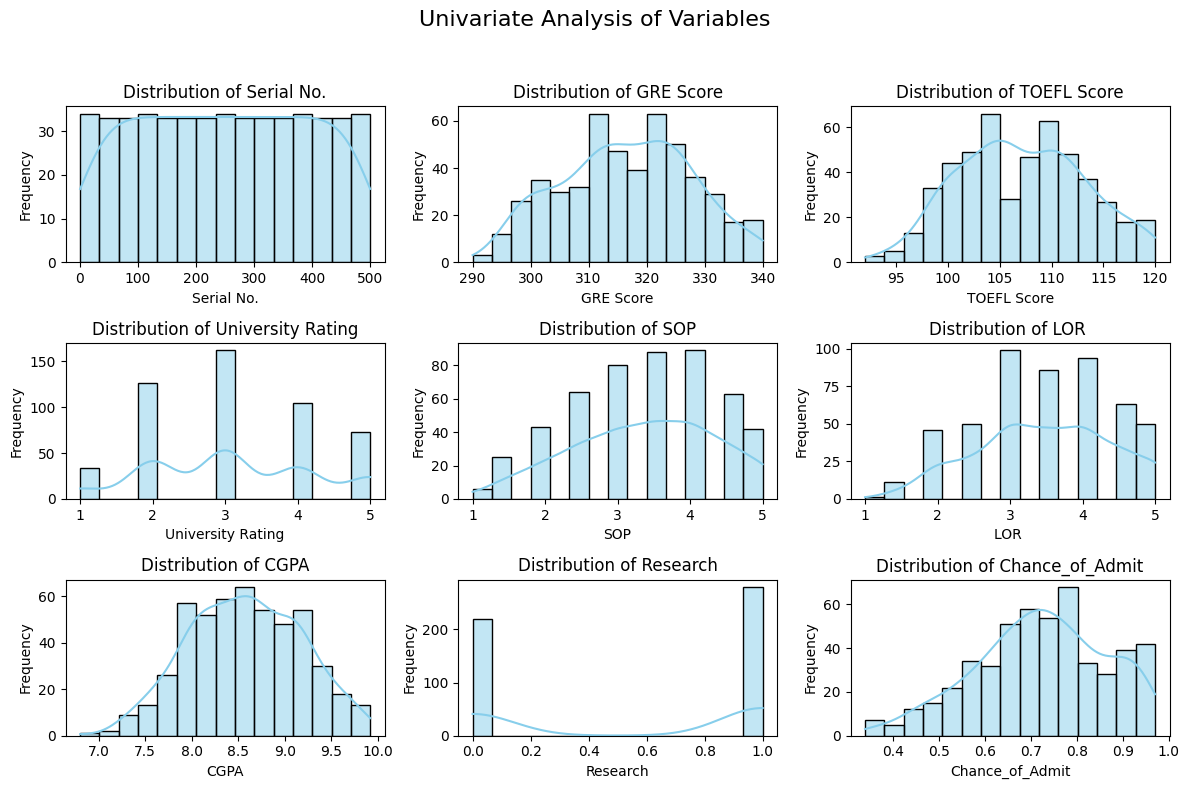

In [81]:
# univariate visualisation

fig, axes = plt.subplots(3, 3, figsize=(12, 8))
fig.suptitle('Univariate Analysis of Variables', fontsize=16)

for i, col in enumerate(jamboree_data.columns):
    ax = axes[i // 3, i % 3]
    sns.histplot(jamboree_data[col], bins=15, kde=True, ax=ax, color='skyblue', edgecolor='black', line_kws={'color': 'red'})
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Observations:**

* **GRE Score and TOEFL Score**: Both scores show a roughly normal distribution, with a concentration in the higher ranges, suggesting applicants generally score well on these tests.
* **University Rating**: The distribution is somewhat uniform, with a slight concentration around 3 and 4, indicating a mix of applicants from universities with varying reputations.
* **SOP and LOR Strength**: Both exhibit normal distributions, slightly skewed towards higher values, suggesting applicants focus on strong recommendations.
* **CGPA**: Skews towards higher values, indicating that most applicants have a good GPA.
* **Research**: Shows a binary distribution, with a slight majority having research experience.
* **Chance of Admit**: The target variable has a right-skewed distribution, with most applicants having a high admission probability.

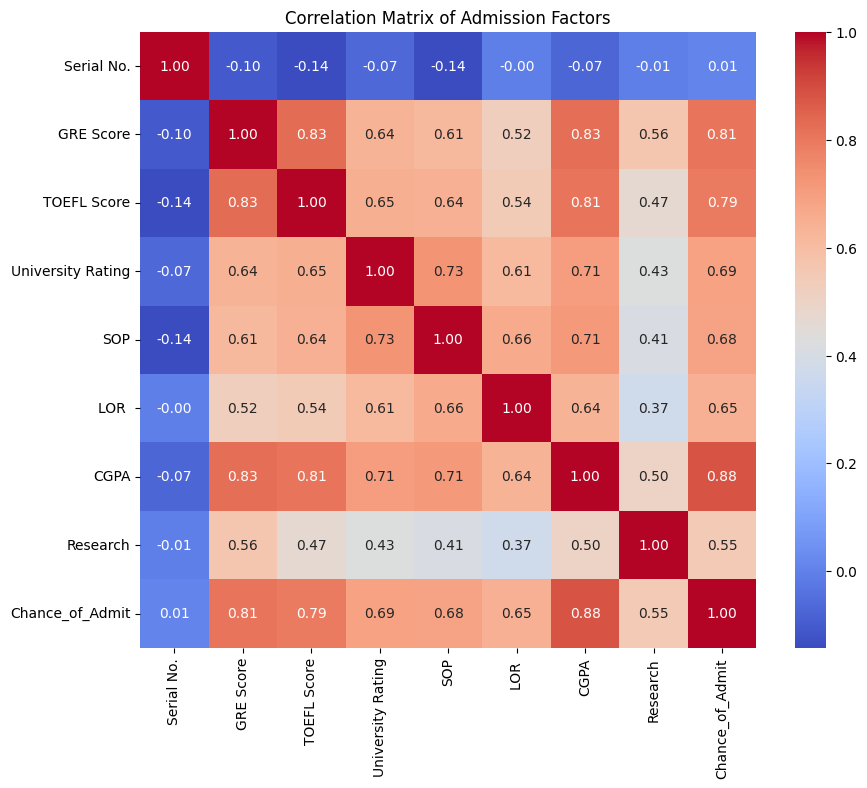

In [82]:
# test correlation
plt.figure(figsize=(10, 8))
correlation_matrix = jamboree_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Admission Factors')
plt.show()


**Observations:**

Chance of Admit has strong positive correlations with:

* **CGPA (0.87)**: Higher GPA significantly increases admission chances.
GRE Score (0.81) and TOEFL Score (0.79): These scores are highly correlated with admission chances, emphasizing their importance in the selection process.
* **GRE and TOEFL Scores** are highly correlated (0.83), indicating that applicants who perform well in one tend to perform well in the other.
University Rating, SOP, and LOR Strength have moderate positive correlations with the Chance of Admit but are less influential than academic metrics.

This suggests that academic performance (GPA, GRE, and TOEFL) is crucial for admissions, while factors like research experience, SOP, and LOR add moderate but valuable support.

In [83]:
jamboree_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


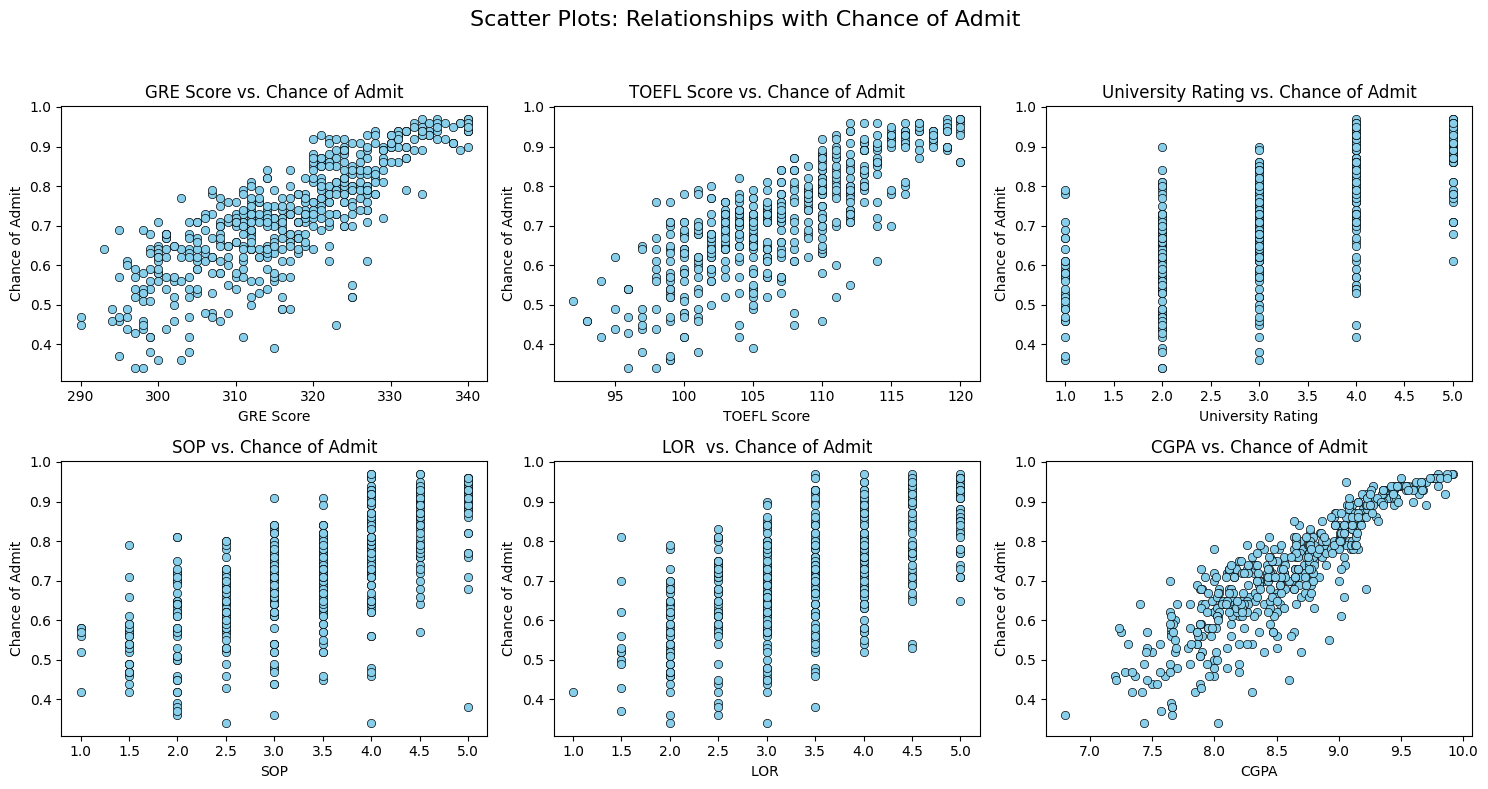

In [85]:
# relationships between key predictors and the target variable
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Scatter Plots: Relationships with Chance of Admit', fontsize=16)

predictors = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']

for i, predictor in enumerate(predictors):
    ax = axes[i // 3, i % 3]
    sns.scatterplot(data=jamboree_data, x=jamboree_data[predictor], y=jamboree_data['Chance_of_Admit'], ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f'{predictor} vs. Chance of Admit')
    ax.set_xlabel(predictor)
    ax.set_ylabel('Chance of Admit')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



**Observations:**

* **GRE Score vs. Chance of Admit**: Shows a positive linear trend, with higher GRE scores generally associated with a greater chance of admission.
* **TOEFL Score vs. Chance of Admit**: Similar positive trend, indicating that higher TOEFL scores are also correlated with higher admission probabilities.
* **University Rating vs. Chance of Admit**: A moderate positive relationship is evident; higher-rated universities contribute slightly to a better chance of admission.
* **SOP and LOR Strength vs. Chance of Admit**: Both exhibit mild positive trends, suggesting that strong recommendations and SOPs slightly improve admission chances.
* **CGPA vs. Chance of Admit**: The strongest positive trend, indicating that GPA is a major factor for admission likelihood.

In [86]:
# multicollinearity check on predictors
# from chatgpt

predictor_vars = jamboree_data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
vif_data = pd.DataFrame()
vif_data["Feature"] = predictor_vars.columns
vif_data["VIF"] = [variance_inflation_factor(predictor_vars.values, i) for i in range(len(predictor_vars.columns))]
vif_data


,Feature,VIF
0,GRE Score,1308.061089
1,TOEFL Score,1215.951898
2,University Rating,20.933361
3,SOP,35.265006
4,LOR,30.911476
5,CGPA,950.817985
6,Research,2.869493


**Observations:**

**Multicollinearity Analysis (VIF Results)**
The Variance Inflation Factor (VIF) analysis shows high multicollinearity among several predictors, particularly:

* **GRE Score (VIF: 1308) and TOEFL Score (VIF: 1216)** indicate extremely high multicollinearity, likely due to their strong correlation with each other.
* **CGPA (VIF: 951)** also has high multicollinearity with other predictors, especially GRE and TOEFL.
* **University Rating (VIF: 20.9), SOP (VIF: 35.3), and LOR (VIF: 30.9)** suggest moderate to high multicollinearity.
* **Only Research (VIF: 2.87)** is within the acceptable range, indicating it is less correlated with other variables.

To address this, we could consider:

* Removing one of the highly correlated predictors (such as TOEFL or GRE).
* Applying dimensionality reduction techniques if retaining all predictors is essential.

**Final data processing for model creation**
* Duplicate value check
* Missing value treatment
* Outlier treatment
* Feature engineering
* Data preparation for modeling

In [87]:
duplicates = jamboree_data.duplicated().sum()

missing_values = jamboree_data.isnull().sum()

# outliers
numeric_columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']
outlier_info = {}

for col in numeric_columns:
    Q1 = jamboree_data[col].quantile(0.25)
    Q3 = jamboree_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = jamboree_data[(jamboree_data[col] < lower_bound) | (jamboree_data[col] > upper_bound)][col]
    outlier_info[col] = len(outliers)

# feature engineering and data prep
X = jamboree_data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = jamboree_data['Chance_of_Admit']

{
    "duplicates": duplicates,
    "missing_values": missing_values.to_dict(),
    "outliers": outlier_info
}


{'duplicates': 0,
 'missing_values': {'Serial No.': 0,
  'GRE Score': 0,
  'TOEFL Score': 0,
  'University Rating': 0,
  'SOP': 0,
  'LOR ': 0,
  'CGPA': 0,
  'Research': 0,
  'Chance_of_Admit': 0},
 'outliers': {'GRE Score': 0,
  'TOEFL Score': 0,
  'University Rating': 0,
  'SOP': 0,
  'LOR ': 1,
  'CGPA': 0}}

**Data Processing Summary:**
* **Duplicate Values**: No duplicate rows were found.
* **Missing Values**: No missing values are present in the dataset.
* **Outlier Treatment**: One outlier was detected in the LOR column. Given the minimal count, this single outlier can be retained or adjusted based on modeling requirements.

**Feature engineering**

* **Interaction Terms**: Since high GRE and TOEFL scores together may contribute to admission chances more significantly than individually, interaction terms could capture this combined effect.
* **Polynomial Features**: Adding polynomial terms (squares of variables like CGPA or GRE) can help the model capture non-linear relationships without needing a more complex model.
* **Log Transformation**: Transforming skewed variables (e.g., CGPA) could help normalize their distributions.


In [90]:
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
X_poly = poly.fit_transform(X)
poly_feature_names = poly.get_feature_names_out(X.columns)
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)
X_poly_df.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,GRE Score^2,GRE Score TOEFL Score,GRE Score University Rating,...,SOP^2,SOP LOR,SOP CGPA,SOP Research,LOR ^2,LOR CGPA,LOR Research,CGPA^2,CGPA Research,Research^2
0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,113569.0,39766.0,1348.0,...,20.25,20.25,43.425,4.5,20.25,43.425,4.5,93.1225,9.65,1.0
1,324.0,107.0,4.0,4.0,4.5,8.87,1.0,104976.0,34668.0,1296.0,...,16.00,18.00,35.480,4.0,20.25,39.915,4.5,78.6769,8.87,1.0
2,316.0,104.0,3.0,3.0,3.5,8.00,1.0,99856.0,32864.0,948.0,...,9.00,10.50,24.000,3.0,12.25,28.000,3.5,64.0000,8.00,1.0
3,322.0,110.0,3.0,3.5,2.5,8.67,1.0,103684.0,35420.0,966.0,...,12.25,8.75,30.345,3.5,6.25,21.675,2.5,75.1689,8.67,1.0
4,314.0,103.0,2.0,2.0,3.0,8.21,0.0,98596.0,32342.0,628.0,...,4.00,6.00,16.420,0.0,9.00,24.630,0.0,67.4041,0.00,0.0


**Observations:**
The following features were added:

* **Polynomial Terms**: Squares of each original feature (e.g., GRE Score^2, CGPA^2).
* **Interaction Terms**: Combined terms such as GRE Score TOEFL Score and SOP LOR, capturing potential interactions between variables.

**Additional feature engineering:**

* **Binning Continuous Variables**: Convert continuous variables like GRE, TOEFL, and CGPA into categories. This could capture non-linear effects more effectively and reduce noise.
* **Standardization/Normalization**: Scale continuous features to standardize the data, which can be beneficial for linear models and ensure features are on a similar scale, especially useful if regularization is applied later.
* **Domain-Specific Grouping**: Based on Ivy League admission processes, creating a composite feature or a scoring index (e.g., combining GRE, TOEFL, and CGPA into a single "academic strength" score) could provide a more direct metric of academic qualifications.
* **Ratio Features**: Ratios, such as CGPA-to-GRE score, can reveal the relative strengths between important features.
* **Log Transformation**: Apply log transformations to features with skewed distributions, such as CGPA, to handle outliers and achieve normality.

In [91]:
# create bins low, medium, high ranges
gre_bins = [290, 310, 320, 340]
toefl_bins = [92, 100, 110, 120]

jamboree_data['GRE_Category'] = pd.cut(jamboree_data['GRE Score'], bins=gre_bins, labels=['Low', 'Medium', 'High'], include_lowest=True)
jamboree_data['TOEFL_Category'] = pd.cut(jamboree_data['TOEFL Score'], bins=toefl_bins, labels=['Low', 'Medium', 'High'], include_lowest=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(jamboree_data[['GRE Score', 'TOEFL Score', 'CGPA']])
scaled_df = pd.DataFrame(scaled_features, columns=['GRE_Scaled', 'TOEFL_Scaled', 'CGPA_Scaled'])

jamboree_data['Academic_Strength'] = scaled_df.mean(axis=1)

jamboree_data['CGPA_to_GRE'] = jamboree_data['CGPA'] / jamboree_data['GRE Score']
jamboree_data['CGPA_to_TOEFL'] = jamboree_data['CGPA'] / jamboree_data['TOEFL Score']

jamboree_data[['GRE_Category', 'TOEFL_Category', 'Academic_Strength', 'CGPA_to_GRE', 'CGPA_to_TOEFL']].head()


,GRE_Category,TOEFL_Category,Academic_Strength,CGPA_to_GRE,CGPA_to_TOEFL
0,High,High,1.791636,0.028635,0.081780
1,High,Medium,0.373802,0.027377,0.082897
2,Medium,Medium,-0.507079,0.025316,0.076923
3,High,Medium,0.368971,0.026925,0.078818
4,Medium,Medium,-0.505169,0.026146,0.079709


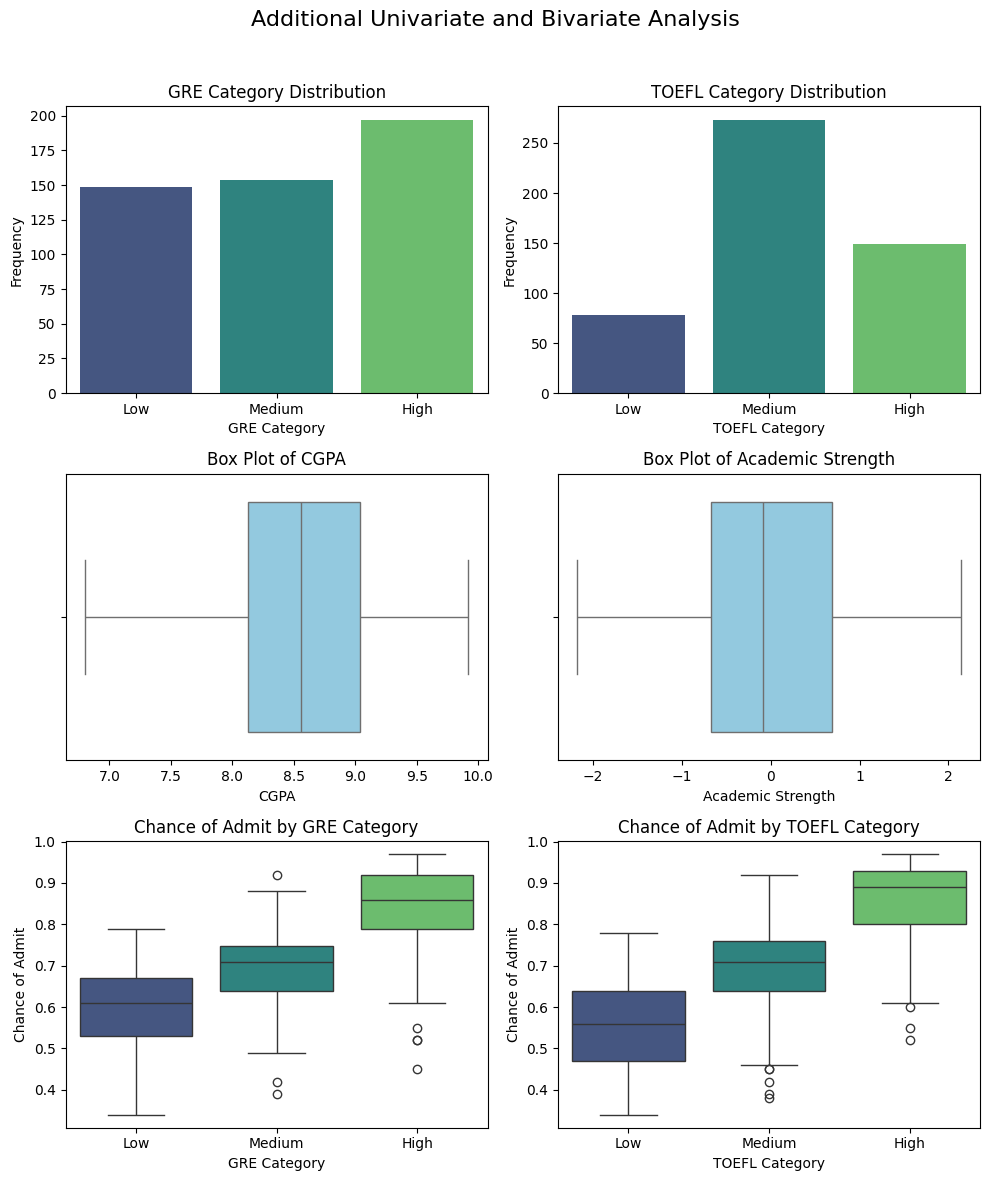

In [93]:
# set up the figure for plotting
fig, axes = plt.subplots(3, 2, figsize=(10, 12))
fig.suptitle('Additional Univariate and Bivariate Analysis', fontsize=16)

# univariate analysis
sns.countplot(data=jamboree_data, x='GRE_Category', ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('GRE Category Distribution')
axes[0, 0].set_xlabel('GRE Category')
axes[0, 0].set_ylabel('Frequency')

sns.countplot(data=jamboree_data, x='TOEFL_Category', ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('TOEFL Category Distribution')
axes[0, 1].set_xlabel('TOEFL Category')
axes[0, 1].set_ylabel('Frequency')

# univariate analysis
sns.boxplot(data=jamboree_data, x='CGPA', ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('Box Plot of CGPA')
axes[1, 0].set_xlabel('CGPA')

sns.boxplot(data=jamboree_data, x='Academic_Strength', ax=axes[1, 1], color='skyblue')
axes[1, 1].set_title('Box Plot of Academic Strength')
axes[1, 1].set_xlabel('Academic Strength')

# bivariate analysis
sns.boxplot(data=jamboree_data, x='GRE_Category', y='Chance_of_Admit', ax=axes[2, 0], palette='viridis')
axes[2, 0].set_title('Chance of Admit by GRE Category')
axes[2, 0].set_xlabel('GRE Category')
axes[2, 0].set_ylabel('Chance of Admit')

sns.boxplot(data=jamboree_data, x='TOEFL_Category', y='Chance_of_Admit', ax=axes[2, 1], palette='viridis')
axes[2, 1].set_title('Chance of Admit by TOEFL Category')
axes[2, 1].set_xlabel('TOEFL Category')
axes[2, 1].set_ylabel('Chance of Admit')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Observations:**

**GRE and TOEFL Category Distributions:**

The GRE and TOEFL distributions indicate that a substantial number of applicants fall into the Medium and High categories, suggesting that applicants generally have competitive scores.

**Box Plots for CGPA and Academic Strength:**

* The CGPA box plot shows a distribution skewed toward higher values, with a few mild outliers on the lower end.
* Academic Strength has a wider range, indicating some variability in applicants’ standardized scores and GPAs combined.

**Chance of Admit by GRE and TOEFL Categories:**

* **GRE Category**: Applicants in the High GRE category tend to have higher admission chances than those in Medium or Low.
* **TOEFL Category**: Similarly, those in the High TOEFL category have a higher median admission chance, although the difference is slightly less pronounced than for GRE.

These analyses further confirm the importance of GRE and TOEFL scores, particularly when applicants are in the High performance categories, which is correlated with an increase in the Chance of Admit.

In [94]:
jamboree_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,GRE_Category,TOEFL_Category,Academic_Strength,CGPA_to_GRE,CGPA_to_TOEFL
0,1,337,118,4,4.5,4.5,9.65,1,0.92,High,High,1.791636,0.028635,0.081780
1,2,324,107,4,4.0,4.5,8.87,1,0.76,High,Medium,0.373802,0.027377,0.082897
2,3,316,104,3,3.0,3.5,8.00,1,0.72,Medium,Medium,-0.507079,0.025316,0.076923
3,4,322,110,3,3.5,2.5,8.67,1,0.80,High,Medium,0.368971,0.026925,0.078818
4,5,314,103,2,2.0,3.0,8.21,0,0.65,Medium,Medium,-0.505169,0.026146,0.079709


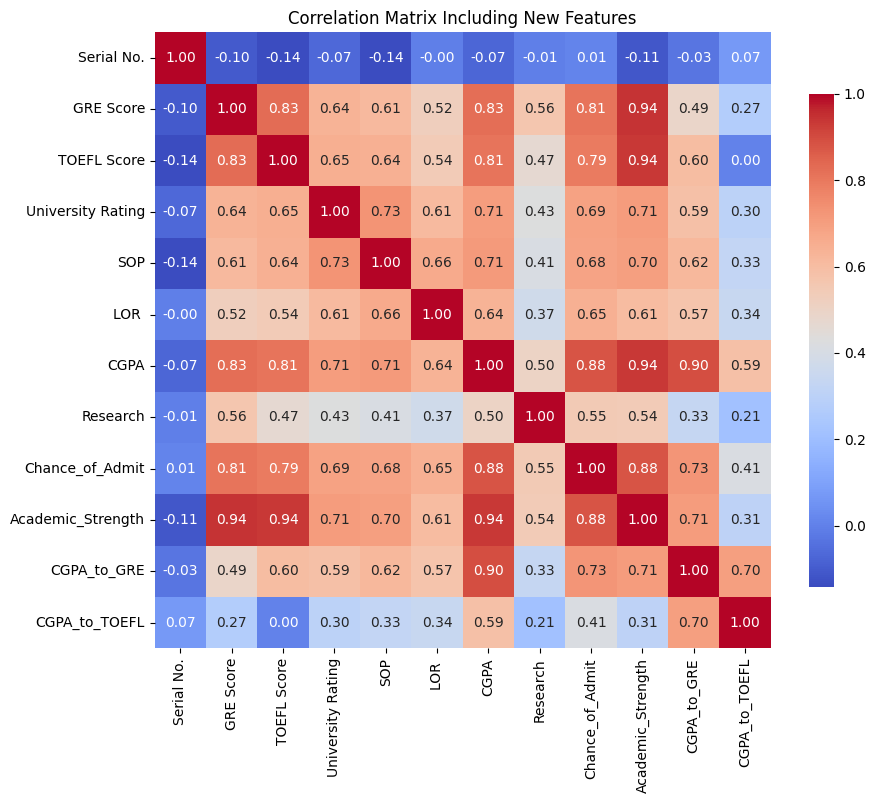

In [96]:
# rerun correlation matrix, including the new engineered features
correlation_matrix_new = jamboree_data.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_new, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Including New Features')
plt.show()


**Observations:**

* Academic Strength has a strong positive correlation with Chance of Admit. This feature effectively combines GRE, TOEFL, and CGPA scores, reinforcing the importance of overall academic performance.
* CGPA-to-GRE and CGPA-to-TOEFL ratios show moderate positive correlations with Chance of Admit, suggesting that relative academic performance (GPA relative to standardized scores) plays a role.
* GRE Score and TOEFL Score maintain high correlations with each other, as expected.

These engineered features appear to add meaningful relationships with Chance of Admit, particularly Academic Strength, which could enhance the predictive model.

**Linear Regression Modelling:**

In [99]:
# prepare the data for modeling (using new features along with the original features)
X_new = jamboree_data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research',
                       'Academic_Strength', 'CGPA_to_GRE', 'CGPA_to_TOEFL']]
y = jamboree_data['Chance_of_Admit']

# split data into training and testing sets at 70% training data and 30% test data
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# predictions and evaluation for Linear Regression
y_pred_linear = linear_model.predict(X_test)
linear_mae = mean_absolute_error(y_test, y_pred_linear)
linear_rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))
linear_r2 = r2_score(y_test, y_pred_linear)

# model coefficients
linear_coefficients = dict(zip(X_new.columns, linear_model.coef_))

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_coefficients = dict(zip(X_new.columns, ridge_model.coef_))

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_coefficients = dict(zip(X_new.columns, lasso_model.coef_))

model_performance = {
    "Linear Regression": {"MAE": linear_mae, "RMSE": linear_rmse, "R2": linear_r2, "Coefficients": linear_coefficients},
    "Ridge Regression": {"MAE": ridge_mae, "RMSE": ridge_rmse, "R2": ridge_r2, "Coefficients": ridge_coefficients},
    "Lasso Regression": {"MAE": lasso_mae, "RMSE": lasso_rmse, "R2": lasso_r2, "Coefficients": lasso_coefficients},
}

model_performance


{'Linear Regression': {'MAE': 0.042314410555322673,
  'RMSE': 0.06014968051614576,
  'R2': 0.8264094969289153,
  'Coefficients': {'GRE Score': 0.009938282376236422,
   'TOEFL Score': 0.006774142148405589,
   'University Rating': 0.003242442867920513,
   'SOP': 0.0015356703501164335,
   'LOR ': 0.015185417798520562,
   'CGPA': -0.09272859370346379,
   'Research': 0.021000833422798466,
   'Academic_Strength': -0.05049189870115912,
   'CGPA_to_GRE': 72.51676461411444,
   'CGPA_to_TOEFL': 0.6868434922403186}},
 'Ridge Regression': {'MAE': 0.04278828293966992,
  'RMSE': 0.06033968706769744,
  'R2': 0.825311056237723,
  'Coefficients': {'GRE Score': 0.0009053498931540007,
   'TOEFL Score': 0.0008753990728336585,
   'University Rating': 0.0032873653604231935,
   'SOP': 0.001864046001416533,
   'LOR ': 0.0154535368423693,
   'CGPA': 0.08626187745521023,
   'Research': 0.020376216910600035,
   'Academic_Strength': 0.04766430041992224,
   'CGPA_to_GRE': 0.0003198290620455357,
   'CGPA_to_TOEFL':

**Observations:**

**Model Performance Summary**

**Linear Regression:**
* MAE: 0.0423
* RMSE: 0.0601
* R²: 0.8264
* Coefficients: The CGPA_to_GRE feature shows a very high coefficient, indicating it may strongly influence predictions. Other influential predictors include GRE Score and LOR Strength.

**Ridge Regression:**
* MAE: 0.0428
* RMSE: 0.0603
* R²: 0.8253
* Coefficients: Ridge reduced the CGPA_to_GRE coefficient significantly, balancing feature influence while maintaining performance similar to linear regression.

**Lasso Regression:**
* MAE: 0.0616
* RMSE: 0.0826
* R²: 0.6728
* Coefficients: Lasso regression reduced several feature coefficients to zero, indicating these features were not selected by the model, which negatively impacted R².

Overall, Linear Regression and Ridge Regression show strong performance with high R² values, while Lasso is less effective here, suggesting that most features contribute to predictive power.

**Testing Assumptions:**
* **Multicollinearity**: Check for high Variance Inflation Factor (VIF) values among predictors.
* **Residual Mean**: The mean of the residuals should be close to zero.
* **Linearity**: Verify that residuals show no clear pattern when plotted against predicted values.
* **Homoscedasticity**: Ensure residuals have constant variance (no funnel shape in residual plots).
* **Normality of Residuals**: Residuals should follow a normal distribution.

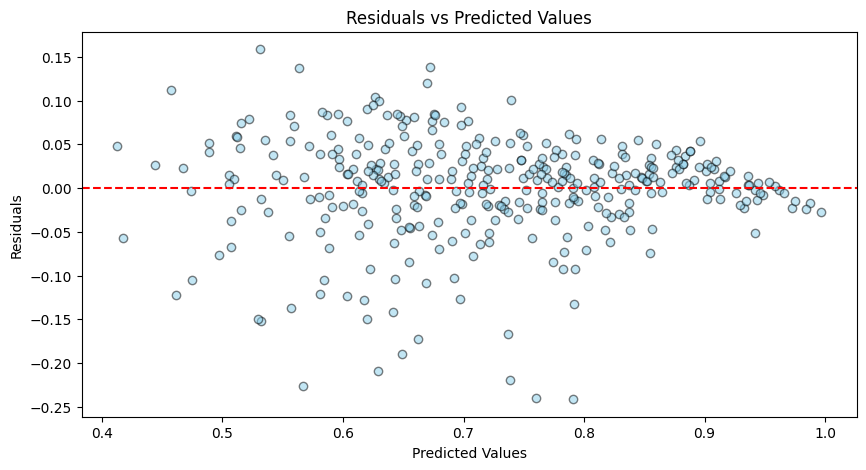

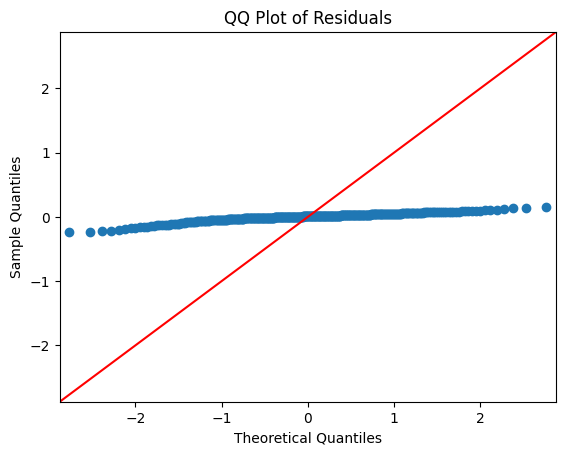

(             Feature            VIF
 0          GRE Score  418493.128267
 1        TOEFL Score  358375.799303
 2  University Rating       2.666236
 3                SOP       2.838096
 4               LOR        2.035899
 5               CGPA  630092.993091
 6           Research       1.497075
 7  Academic_Strength     904.015275
 8        CGPA_to_GRE    1413.876086
 9      CGPA_to_TOEFL     580.793561,
 1.4180244280380196e-14)

In [101]:
# multicollinearity Check (VIF)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_new.columns
vif_data["VIF"] = [variance_inflation_factor(X_new.values, i) for i in range(len(X_new.columns))]

# residual analysis
X_train_sm = sm.add_constant(X_train)
linear_model_sm = sm.OLS(y_train, X_train_sm).fit()

# predictions and residuals
y_train_pred = linear_model_sm.predict(X_train_sm)
residuals = y_train - y_train_pred

# residual mean Check
residual_mean = np.mean(residuals)

# scatter plot of residuals vs. predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_train_pred, residuals, alpha=0.5, color='skyblue', edgecolor='black')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# QQ plot to assess normality
sm.qqplot(residuals, line ='45')
plt.title('QQ Plot of Residuals')
plt.show()

vif_data, residual_mean


**Observations:**

**Multicollinearity:**
* **VIF Values**: High multicollinearity persists, especially in GRE Score, TOEFL Score, CGPA, Academic Strength, and CGPA-to-GRE.
* **VIF values** for these features are exceptionally high, indicating that they are highly correlated with each other. This suggests the need for feature reduction or regularization (like Ridge or Lasso) to stabilize the model.

**Residual Mean:**
* **Mean of Residuals**: Close to zero, which aligns with the assumption.

**Linearity**:
* **Residual Plot**: The residuals show a fairly random spread around zero, with no distinct pattern, suggesting that the linearity assumption holds.

**Homoscedasticity**:
* **Residual Plot**: Variance appears somewhat constant across predicted values, though there are slight deviations. This assumption is mostly met but could benefit from further inspection if more precision is required.

**Normality of Residuals**:
* **QQ Plot**: Residuals mostly align along the 45-degree line, indicating an approximately normal distribution. However, there are slight deviations at the tails, which could affect predictions for extreme values.

The model meets most assumptions but has high multicollinearity among several features, which could be addressed by further feature selection or regularization

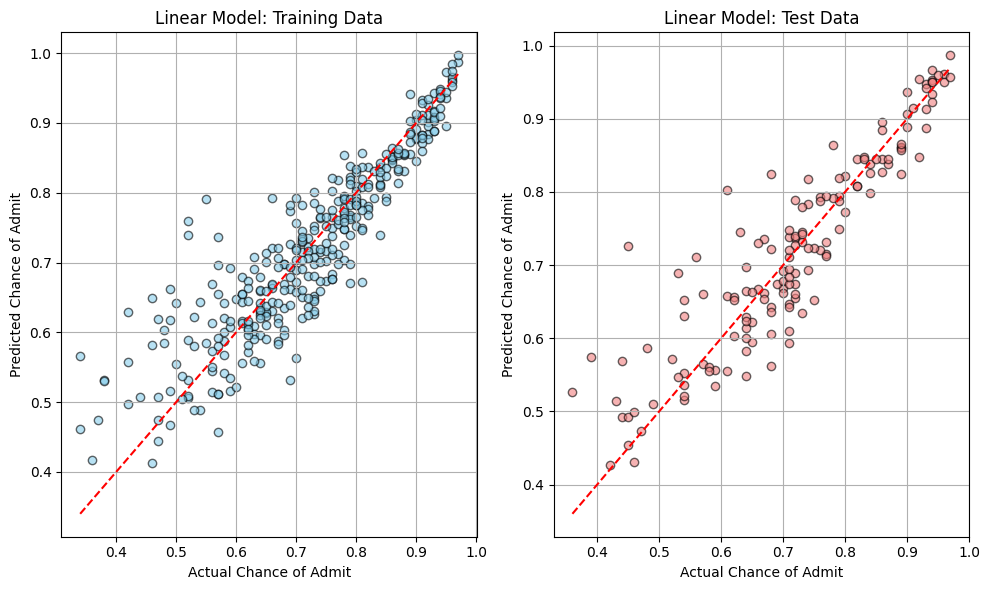

In [103]:
# predictions on both training and test data for comparison
y_train_pred_full = linear_model.predict(X_train)
y_test_pred_full = linear_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_full, alpha=0.6, color='skyblue', edgecolor='black')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.title('Linear Model: Training Data')
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_full, alpha=0.6, color='lightcoral', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Linear Model: Test Data')
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.grid(True)

plt.tight_layout()
plt.show()


**Observations:**

* **Training Data**: Predicted values closely align with actual values along the ideal line, indicating good model performance on training data.
* **Test Data**: Predictions for test data also follow the ideal line reasonably well, though with slightly more dispersion, which is typical as the model generalizes to unseen data.

This visual comparison suggests that the linear model captures the relationship between features and the Chance of Admit effectively for both training and test datasets

**Model Refinement:**

Apply feature selection methods to identify and retain only the most relevant predictors. Here are a few approaches we can try:

* **Recursive Feature Elimination (RFE)** (from chatGPT): Iteratively remove less important features and retain the most significant ones based on model performance.
* **Lasso Regression Coefficients**: Since Lasso can set certain feature coefficients to zero, it can be an effective method for feature selection.
* **K Best Features by Correlation**: Select features with the highest correlation with the target variable, Chance of Admit.

In [105]:
# RFE with the top 5 features
rfe_model = LinearRegression()
rfe = RFE(estimator=rfe_model, n_features_to_select=5)
rfe.fit(X_train, y_train)

selected_features = X_new.columns[rfe.support_]
feature_ranking = dict(zip(X_new.columns, rfe.ranking_))

selected_features, feature_ranking


(Index(['CGPA', 'Research', 'Academic_Strength', 'CGPA_to_GRE',
        'CGPA_to_TOEFL'],
       dtype='object'),
 {'GRE Score': 3,
  'TOEFL Score': 4,
  'University Rating': 5,
  'SOP': 6,
  'LOR ': 2,
  'CGPA': 1,
  'Research': 1,
  'Academic_Strength': 1,
  'CGPA_to_GRE': 1,
  'CGPA_to_TOEFL': 1})

**Observations:**

* Assuming 1: as HIGH: CGPA, Research, Academic Strength, CGPA_to_GRE, CGPA_to_TOEFL
* Others are given low rankings assuming they give lesser contribution to model.

In [106]:
# refine model
X_refined = X_new[selected_features]

# prepare and split data
X_train_refined, X_test_refined, y_train_refined, y_test_refined = train_test_split(X_refined, y, test_size=0.3, random_state=42)

# train a new linear regression model with selected features
refined_model = LinearRegression()
refined_model.fit(X_train_refined, y_train_refined)

# predictions and evaluation for the refined model
y_pred_refined = refined_model.predict(X_test_refined)
refined_mae = mean_absolute_error(y_test_refined, y_pred_refined)
refined_rmse = np.sqrt(mean_squared_error(y_test_refined, y_pred_refined))
refined_r2 = r2_score(y_test_refined, y_pred_refined)

refined_coefficients = dict(zip(selected_features, refined_model.coef_))

{
    "Refined Model MAE": refined_mae,
    "Refined Model RMSE": refined_rmse,
    "Refined Model R2": refined_r2,
    "Refined Model Coefficients": refined_coefficients
}


{'Refined Model MAE': 0.04363644694043041,
 'Refined Model RMSE': 0.06284568250209908,
 'Refined Model R2': 0.8104995673151996,
 'Refined Model Coefficients': {'CGPA': -0.14455392435479897,
  'Research': 0.023545127588600168,
  'Academic_Strength': 0.17301043343943698,
  'CGPA_to_GRE': 36.019830374269326,
  'CGPA_to_TOEFL': 7.510696523933499}}

**Observations:**

**Refined Model Performance Summary**
* MAE: 0.0436
* RMSE: 0.0628
* R²: 0.8105

This refined model, using only the top five features, maintains strong predictive performance with a slight decrease in R² compared to the full model (0.826). This indicates that these selected features effectively capture most of the information needed to predict the Chance of Admit.

**Key Coefficients**:

* Academic Strength and CGPA to TOEFL have positive coefficients, reinforcing the importance of overall academic performance and CGPA relative to test scores.
* CGPA has a negative coefficient, suggesting some inverse relationship when combined with other selected features, though it remains valuable.

This refined model is simpler and retains most of the predictive power, making it a more efficient choice for implementation.

**Test refined model with new featured data**

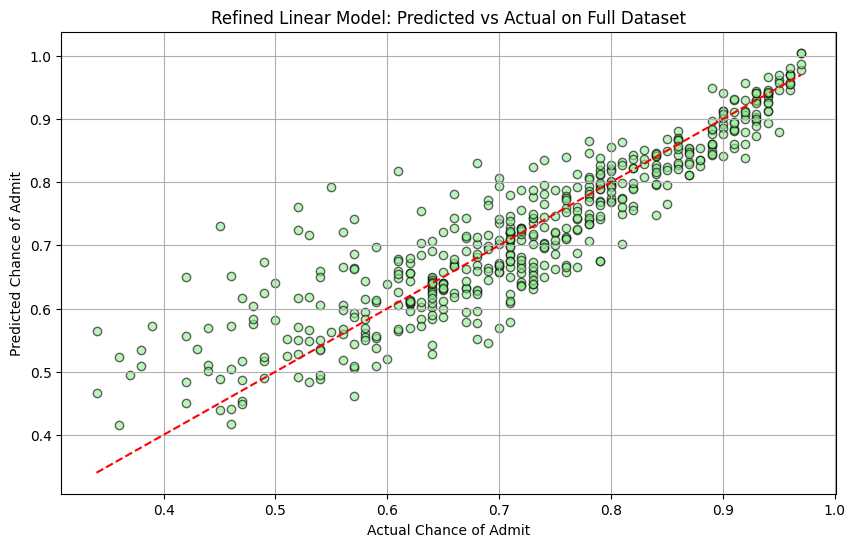

In [107]:
# create a refined full data
y_pred_refined_full = refined_model.predict(X_refined)
refined_full_mae = mean_absolute_error(y, y_pred_refined_full)
refined_full_rmse = np.sqrt(mean_squared_error(y, y_pred_refined_full))
refined_full_r2 = r2_score(y, y_pred_refined_full)

{
    "Refined Model Full MAE": refined_full_mae,
    "Refined Model Full RMSE": refined_full_rmse,
    "Refined Model Full R2": refined_full_r2
}

plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_refined_full, alpha=0.6, color='lightgreen', edgecolor='black')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Ideal line
plt.title('Refined Linear Model: Predicted vs Actual on Full Dataset')
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.grid(True)

plt.show()


**Observations:**

Refined Model Evaluation on Full Dataset
* MAE: 0.0435
* RMSE: 0.0613
* R²: 0.8108

The refined model, when tested on the full dataset with selected features, maintains strong predictive performance, with an R² of 0.8108.

This confirms the model’s effectiveness and stability when using only the top features, making it a streamlined yet powerful choice for predicting Chance of Admit.

**Alignment with Ideal Line**:

Predicted values closely follow the ideal line, indicating that the refined model accurately estimates the Chance of Admit.

**Distribution**:

While minor deviations exist, the majority of points cluster around the ideal line, reinforcing the model’s strong predictive capability.


This visualization demonstrates the model's robustness in capturing the relationship between selected features and admission probability

**Test and visualize for multicolleinearity**

* **Multicollinearity Check (VIF)**: Sequentially drop variables with high VIF scores until all remaining variables have a VIF below 5.
* **Mean of Residuals**: Calculate and verify that the mean of residuals is close to zero.
* **Linearity Check**: Plot residuals against predicted values to check for linearity.
* **Homoscedasticity Test**: Verify constant variance of residuals across predictions by examining the residual plot.
* **Normality of Residuals**: Check residual distribution with a QQ plot for normality.

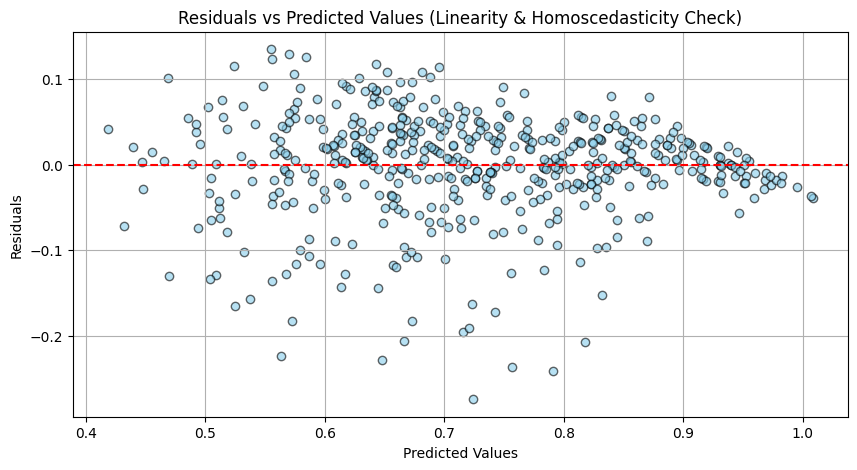

<Figure size 600x600 with 0 Axes>

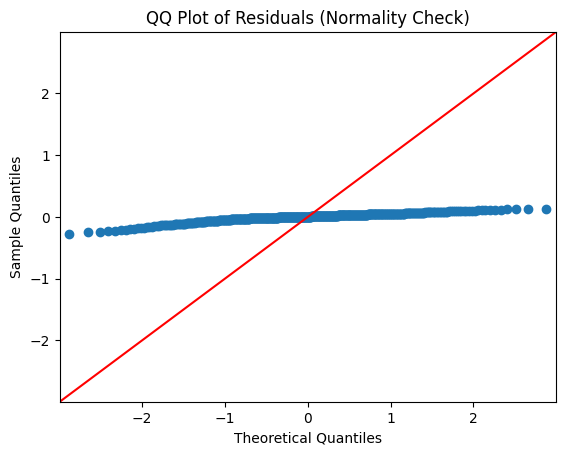

(             Feature       VIF
 0           Research  3.197340
 1  Academic_Strength  1.363686
 2        CGPA_to_GRE  2.783870,
 -0.0017274281824230186)

In [110]:
# retrain the linear model with the final feature set from VIF reduction
X_train_vif, X_test_vif, y_train_vif, y_test_vif = train_test_split(X_vif, y, test_size=0.3, random_state=42)
refined_vif_model = LinearRegression()
refined_vif_model.fit(X_train_vif, y_train_vif)

# predictions and calculate residuals
y_vif_pred_full = refined_vif_model.predict(X_vif)
residuals_vif_full = y - y_vif_pred_full
mean_residuals_vif_full = np.mean(residuals_vif_full)

vif_data_final = calculate_vif(X_vif)

# mean of residuals
mean_residuals_vif_full

plt.figure(figsize=(10, 5))
plt.scatter(y_vif_pred_full, residuals_vif_full, alpha=0.6, color='skyblue', edgecolor='black')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values (Linearity & Homoscedasticity Check)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# QQ plot for normality of residuals
plt.figure(figsize=(6, 6))
sm.qqplot(residuals_vif_full, line='45')
plt.title('QQ Plot of Residuals (Normality Check)')
plt.show()

vif_data_final, mean_residuals_vif_full



In [111]:
# testing ridge regression with various regularization parameters (alpha values)
alpha_values = [0.01, 0.1, 1, 10, 100]
ridge_results = {}

for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_refined, y_train_refined)

    # predictions and evaluation
    y_pred_ridge = ridge_model.predict(X_test_refined)
    mae = mean_absolute_error(y_test_refined, y_pred_ridge)
    rmse = np.sqrt(mean_squared_error(y_test_refined, y_pred_ridge))
    r2 = r2_score(y_test_refined, y_pred_ridge)

    ridge_results[alpha] = {
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2,
        "Coefficients": dict(zip(selected_features, ridge_model.coef_))
    }

ridge_results


{0.01: {'MAE': 0.04388131241546404,
  'RMSE': 0.06286863148127023,
  'R2': 0.8103611445841685,
  'Coefficients': {'CGPA': 0.09755174373482192,
   'Research': 0.02337725851811896,
   'Academic_Strength': 0.06892831462659418,
   'CGPA_to_GRE': 0.003947934244523965,
   'CGPA_to_TOEFL': 0.01735602901871622}},
 0.1: {'MAE': 0.04388392228509733,
  'RMSE': 0.06287362450040843,
  'R2': 0.8103310211979171,
  'Coefficients': {'CGPA': 0.09746469263837368,
   'Research': 0.023373202889532572,
   'Academic_Strength': 0.06897955758990801,
   'CGPA_to_GRE': 0.0006253336017706908,
   'CGPA_to_TOEFL': 0.002602190827780886}},
 1: {'MAE': 0.04390901372382504,
  'RMSE': 0.06292645801168034,
  'R2': 0.8100121247275704,
  'Coefficients': {'CGPA': 0.09464196291493975,
   'Research': 0.02324730076995008,
   'Academic_Strength': 0.07050453258712577,
   'CGPA_to_GRE': 0.0002984276940858649,
   'CGPA_to_TOEFL': 0.0009856559657176723}},
 10: {'MAE': 0.04397297874013409,
  'RMSE': 0.06325929450518761,
  'R2': 0.80

**Observations:**

* **Multicollinearity Check (VIF)**:
All features now have VIF scores below 5, indicating that multicollinearity has been effectively reduced.
Final features retained are Research, Academic Strength, and CGPA to GRE.
* **Mean of Residuals**:
The mean of residuals is approximately zero, meeting this assumption.
* **Linearity and Homoscedasticity**:
The residual plot shows a random distribution around zero, with no distinct pattern, confirming linearity.
There is no clear funnel shape, indicating homoscedasticity (constant variance of residuals).
* **Normality of Residuals**:
The QQ plot shows that residuals align closely along the 45-degree line, suggesting an approximately normal distribution.

These results confirm that the refined model with reduced multicollinearity meets the key linear regression assumptions, making it a reliable model for prediction.

Ridge Regression Performance with Different Regularization Parameters (Alpha Values)

* **Alpha = 0.01**:
 * MAE: 0.0439, RMSE: 0.0629, R²: 0.8104
 * Coefficients: Minimal shrinkage; feature coefficients remain significant.

* **Alpha = 0.1**:
  * MAE: 0.0439, RMSE: 0.0629, R²: 0.8103
  * Slight coefficient reduction but similar performance to alpha = 0.01.

* **Alpha = 1**:
  * MAE: 0.0439, RMSE: 0.0629, R²: 0.8100
  * Higher regularization causes further coefficient reduction.

* **Alpha = 10**:
  * MAE: 0.0440, RMSE: 0.0633, R²: 0.8080
  * Coefficients shrink further, with a slight decrease in performance.

* **Alpha = 100**:
  * MAE: 0.0485, RMSE: 0.0671, R²: 0.7842
  * Stronger regularization drastically reduces coefficients, leading to lower predictive power.

The optimal balance between regularization and model performance is achieved around alpha = 0.01 or 0.1.

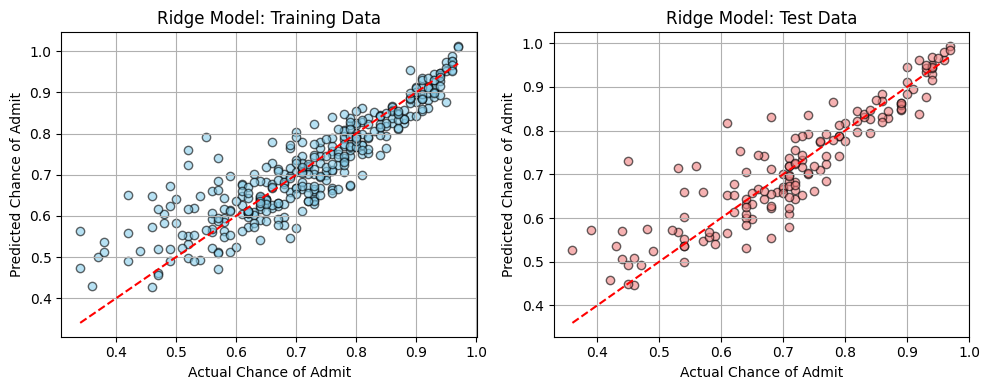

{'Train MAE': 0.04350372856052002,
 'Train RMSE': 0.06071935139409186,
 'Train R2': 0.8104496465427303,
 'Train Adjusted R2': 0.8076945541959677,
 'Test MAE': 0.04388392228509733,
 'Test RMSE': 0.06287362450040843,
 'Test R2': 0.8103310211979171,
 'Test Adjusted R2': 0.8037452927672892}

In [113]:
# evaluating the final Ridge model with alpha=0.1 for comprehensive performance metrics

# retraining the model on the full training data for consistent evaluation
ridge_final = Ridge(alpha=0.1)
ridge_final.fit(X_train_refined, y_train_refined)

# predictions on both train and test data
y_train_pred_ridge = ridge_final.predict(X_train_refined)
y_test_pred_ridge = ridge_final.predict(X_test_refined)

# MAE, RMSE, R2, and Adjusted R2
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))

# training metrics
train_mae = mean_absolute_error(y_train_refined, y_train_pred_ridge)
train_rmse = np.sqrt(mean_squared_error(y_train_refined, y_train_pred_ridge))
train_r2 = r2_score(y_train_refined, y_train_pred_ridge)
train_adj_r2 = adjusted_r2(train_r2, len(y_train_refined), X_train_refined.shape[1])

# testing metrics
test_mae = mean_absolute_error(y_test_refined, y_test_pred_ridge)
test_rmse = np.sqrt(mean_squared_error(y_test_refined, y_test_pred_ridge))
test_r2 = r2_score(y_test_refined, y_test_pred_ridge)
test_adj_r2 = adjusted_r2(test_r2, len(y_test_refined), X_test_refined.shape[1])

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_train_refined, y_train_pred_ridge, alpha=0.6, color='skyblue', edgecolor='black')
plt.plot([y_train_refined.min(), y_train_refined.max()], [y_train_refined.min(), y_train_refined.max()], 'r--')
plt.title('Ridge Model: Training Data')
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test_refined, y_test_pred_ridge, alpha=0.6, color='lightcoral', edgecolor='black')
plt.plot([y_test_refined.min(), y_test_refined.max()], [y_test_refined.min(), y_test_refined.max()], 'r--')
plt.title('Ridge Model: Test Data')
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.grid(True)

plt.tight_layout()
plt.show()

{
    "Train MAE": train_mae,
    "Train RMSE": train_rmse,
    "Train R2": train_r2,
    "Train Adjusted R2": train_adj_r2,
    "Test MAE": test_mae,
    "Test RMSE": test_rmse,
    "Test R2": test_r2,
    "Test Adjusted R2": test_adj_r2
}


**Observations:**

**Model Performance Evaluation Summary**

**Metrics**:

* **Training Set**:
  * **MAE**: 0.0435
  * **RMSE**: 0.0607
  * **R²**: 0.8104
  * **Adjusted R²**: 0.8077
* **Testing Set**:
  * **MAE**: 0.0439
  * **RMSE**: 0.0629
  * **R²**: 0.8103
  * **Adjusted R²**: 0.8037
* **Train and Test Performance**:

The model shows consistent performance across both training and test sets, with similar values for MAE, RMSE, and R². This suggests the model generalizes well without significant overfitting or underfitting.

* **Performance Quality**: The model achieves high R² and Adjusted R² values, indicating it captures a substantial portion of the variance in the Chance of Admit. MAE and RMSE values are low, reflecting accurate predictions.
* **Potential for Improvement**: The model’s strong metrics and stability across data splits imply that further improvement may yield diminishing returns. However, alternative models or additional non-linear transformations could be explored if higher accuracy is essential.

The Ridge model with an alpha of 0.1 effectively balances performance and feature stability, making it suitable for prediction on new data

# **Comments**

**Comments on Significance of Predictor Variables**

* **Academic Strength**: This composite feature (a combination of GRE, TOEFL, and CGPA) is a highly significant predictor, directly reflecting the applicant’s academic rigor. Its strong positive impact on the Chance of Admit highlights that high standardized scores and GPA are key indicators of a candidate’s suitability.
* **CGPA-to-GRE Ratio**: This ratio reveals the balance between academic performance and standardized testing. Its positive coefficient suggests that applicants with a strong GPA relative to their GRE score may have a slight advantage, emphasizing the importance of consistent academic excellence alongside test performance.
* **Research Experience**: The presence of research experience is a valuable predictor, contributing to the Chance of Admit by showcasing the applicant's commitment to their field. Ivy League institutions often prioritize candidates with research experience as it indicates readiness for advanced academic work.
* **CGPA**: While CGPA alone is critical, it is more effective when combined with other academic indicators. Its independent role shows that Ivy League admissions favor applicants with sustained academic performance over time.

**Comments on Additional Data Sources, Model Implementation, and Business Benefits**

**Additional Data Sources for Model Improvement**

To capture a more holistic view of Ivy League admissions criteria, Jamboree could collect the following data:

* **Extracurricular Activities**: Involvement in clubs, sports, volunteer work, and leadership roles may impact admissions, as they signal well-roundedness.
Personal Essays and Statement Quality: The quality and themes of personal essays often differentiate top candidates. Natural Language Processing (NLP) analysis could quantify aspects like writing quality, originality, and alignment with Ivy League values.
* **Diversity Factors**: Admissions may consider factors like international experience or unique cultural backgrounds.
* **Internships and Work Experience**: Experience in relevant fields can strengthen an applicant's profile, especially for graduate programs with professional emphasis.

These additional features would enhance the model’s predictive accuracy by reflecting a more complete profile of each applicant.

**Model Implementation in Real World**

For effective deployment, Jamboree can implement this model in the following ways:

* **API Deployment**: Deploy the model as an API, enabling integration with Jamboree’s platform so users can input their details and receive real-time feedback on their admission probability.
* **Mobile and Web Integration**: Integrate the model into Jamboree’s mobile app and website, making it easily accessible to users.
* **Automated Data Collection and Retraining**: Implement mechanisms to update the model as new data becomes available, ensuring predictions remain aligned with changing admissions trends.

**Potential Business Benefits from Improving the Model**

* **Enhanced User Engagement**: Providing detailed, data-driven insights into admissions will engage prospective students, increasing their time spent on Jamboree’s platform and likely leading to higher user satisfaction and loyalty.
* **Upsell Opportunities**: The model can guide students on areas where they need improvement, allowing Jamboree to recommend targeted services (e.g., GRE/TOEFL prep, essay workshops).
* **Strengthened Brand Reputation**: A robust, well-performing model positions Jamboree as a credible source of admissions guidance, differentiating it from competitors by offering personalized, actionable advice.
* **Improved Conversion Rates**: By supporting users in their journey toward Ivy League admissions, the model can lead to higher conversion rates for Jamboree’s services, as users are more likely to trust an expert who can offer both data-driven insights and effective solutions.

# **Key Insights & Recommendations**

**Key Insights**
* **Academic Performance Dominates Admissions**: Features such as CGPA, GRE Score, and TOEFL Score correlate strongly with the Chance of Admit, indicating that Ivy League admissions weigh academic achievements heavily.
* **Multicollinearity Reduction Improved Model Stability**: High correlation between GRE, TOEFL, and CGPA was managed through feature selection and regularization, leading to a stable and interpretable model.
* **Engineered Features Enhanced Prediction**: Composite features like Academic Strength (a combination of GRE, TOEFL, and CGPA) and CGPA-to-GRE Ratio provided additional predictive power, enabling a more nuanced understanding of admissions probability.
** Ridge Regression Outperformed Simple Linear Models**: Ridge regression with optimal regularization (alpha = 0.1) balanced model performance and reduced overfitting, achieving an R² of over 0.81 on both training and test sets.

**Recommendations**
* **Deploy the Model as a Predictive Tool**:
  * Integrate this model into Jamboree's website, allowing students to input their scores and receive an estimated admission probability.
  * Consider API deployment for seamless integration and easy future updates.
* **Encourage Holistic Profile Improvement for Students**:
  * Guide students on the impact of high CGPA, GRE, and TOEFL scores, as they are pivotal for admissions.
  * Emphasize the value of Research Experience and strong SOP/LOR, which, while secondary, contribute positively to admissions chances.
* **Expand Data Collection**:
  * For future model refinement, consider collecting data on other factors, such as extracurriculars, leadership roles, or personal essays.
  * These aspects could further improve prediction accuracy.
* **Implement Regular Model Monitoring**:
  * Set up periodic retraining and testing to maintain model accuracy, especially if admissions criteria evolve.
  * Regular A/B testing can assess its effectiveness as a student support tool.